In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [176]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [177]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [178]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [179]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


## Exploratory Data Analysis (EDA)

In [180]:
import termcolor
from termcolor import colored

In [181]:
# Check the shape of the datasets

print(f"Shape of traning data= {colored(train.shape,'blue')}, test data= {colored(test.shape,'green')}")

Shape of traning data= (1460, 81), test data= (1459, 80)


In [182]:
# Checking for duplicates in train data:

train.duplicated(subset='Id').sum()

0

In [183]:
test.duplicated(subset='Id').sum()

0

In [184]:
# check for null values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [185]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [186]:
# Checking the number of types of data in train

train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [187]:
# Checking the number of types of data in test

test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

### Data Preprocessing

In [188]:
# Saving ID for train and test

train_ID = train['Id']
test_ID = test['Id']

# Dropping it from datasets

train.drop("Id", axis=1, inplace = True)
test.drop("Id", axis=1,inplace = True)

In [189]:
# Combine Datasets

concat = [train,test]

all_data = pd.concat(concat).reset_index(drop=True)

# Delete Sales price from all_data
all_data.drop(["SalePrice"], axis=1, inplace = True)

In [190]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [191]:
# check the shape

all_data.shape

(2919, 79)

### Missing Values

In [192]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [193]:
all_data['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [194]:
all_data['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [195]:
all_data = all_data.drop(['Utilities','Street','PoolQC',], axis=1)

In [196]:
all_data.shape

(2919, 76)

<AxesSubplot:>

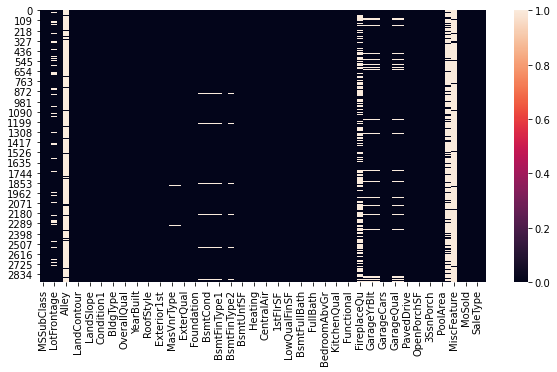

In [197]:
plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

In [198]:
# Check categorical variables that content Null values
print("Categorical columns with Null Values \n")
cate = all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)
cate[cate > 0]

Categorical columns with Null Values 



MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Exterior2nd        1
KitchenQual        1
SaleType           1
Electrical         1
Exterior1st        1
dtype: int64

In [199]:
categ_miss_perc = round(100*(all_data.select_dtypes(include=object).isna().sum().sort_values(ascending = False)/len(all_data.index)), 2).to_frame().rename(columns={0:'Null values percentage'})[:10]
categ_miss_perc

,Null values percentage
MiscFeature,96.40
Alley,93.22
Fence,80.44
FireplaceQu,48.65
GarageCond,5.45
GarageQual,5.45
GarageFinish,5.45
GarageType,5.38
BsmtCond,2.81
BsmtExposure,2.81


In [200]:
all_data = all_data.drop(['MiscFeature','Alley','Fence'], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (2919, 73)


In [201]:
# Fixing cat variables

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')
all_data['Functional'] = all_data['Functional'].fillna('None')
all_data['SaleType'] = all_data['SaleType'].fillna('None')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('None')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('None')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('None')

In [202]:
# Check numberical variables with Null values

print("Numberical columns with Null Values \n")
num = all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)
num[num > 0]

Numberical columns with Null Values 



LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
TotalBsmtSF       1
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [203]:
num_miss_perc = round(100*(all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending = False)/len(all_data.index)), 2).to_frame().rename(columns={0:'Null values percentage'})[:5]
num_miss_perc

,Null values percentage
LotFrontage,16.65
GarageYrBlt,5.45
MasVnrArea,0.79
BsmtHalfBath,0.07
BsmtFullBath,0.07


In [204]:
# Fixing numerical variables by grouping with neighborhood

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(int(0))
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(int(0))
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(int(0))
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(int(0))
all_data['GarageArea'] = all_data['GarageArea'].fillna(int(0))
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(int(0))
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(int(0))
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(int(0))
all_data['GarageCars'] = all_data['GarageCars'].fillna(int(0))


In [205]:
# check for missing values

sum(all_data.select_dtypes(include=object).isna().sum() != 0)

0

<AxesSubplot:>

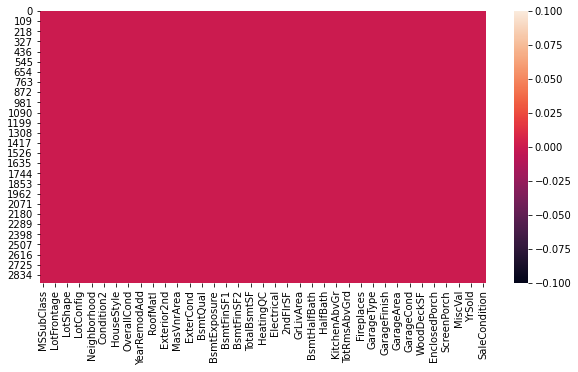

In [206]:
# Visualize with heatmap

plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

## Analyze Target variable

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


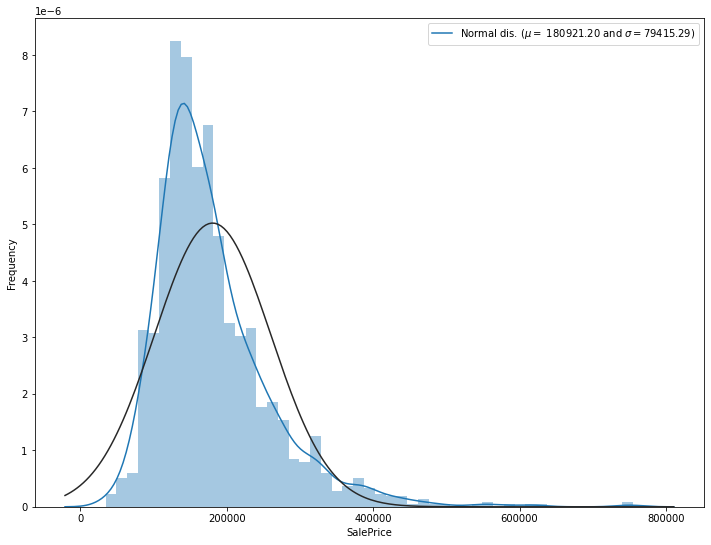

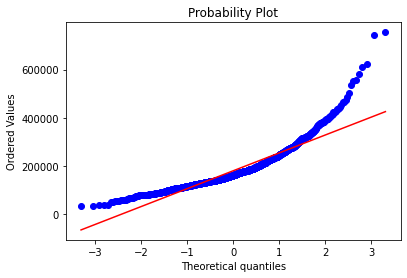

In [207]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'],fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dis. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probability Plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

In [208]:
kurt = train['SalePrice'].kurtosis()
skew = train['SalePrice'].skew()
print('Sale Price Kurtorsis {}'.format(kurt))
print('Sale Price Skewness {}'.format(skew))

Sale Price Kurtorsis 6.536281860064529
Sale Price Skewness 1.8828757597682129


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


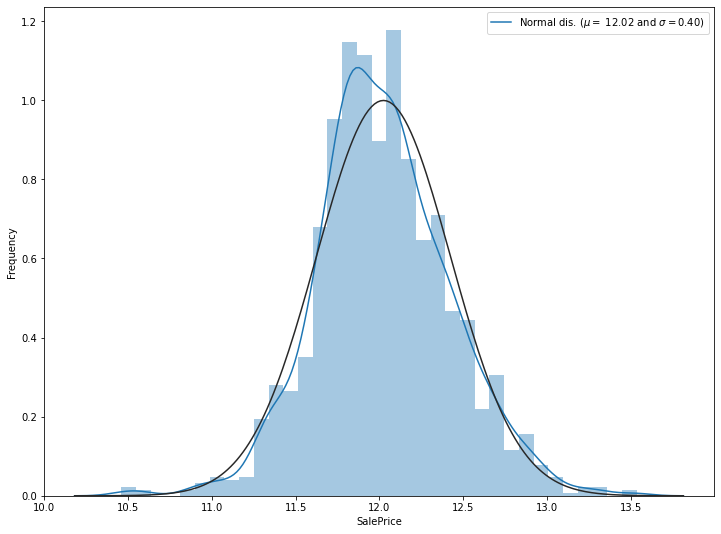

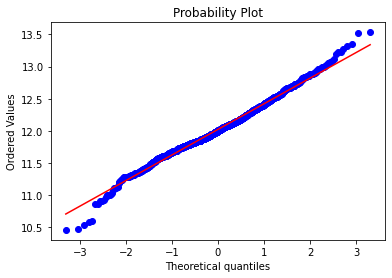

In [209]:
# Log Transformation

train['SalePrice'] = np.log1p(train['SalePrice'])

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'],fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

plt.legend(['Normal dis. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probability Plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()


<AxesSubplot:>

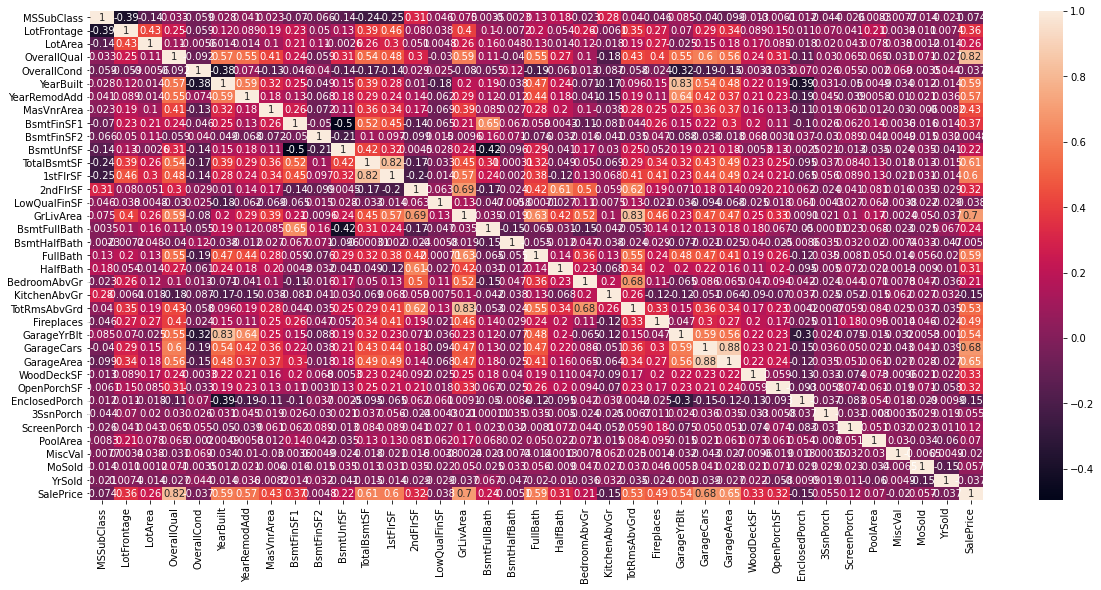

In [210]:
# Correlation

train_corr = train.select_dtypes(include=[np.number])
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

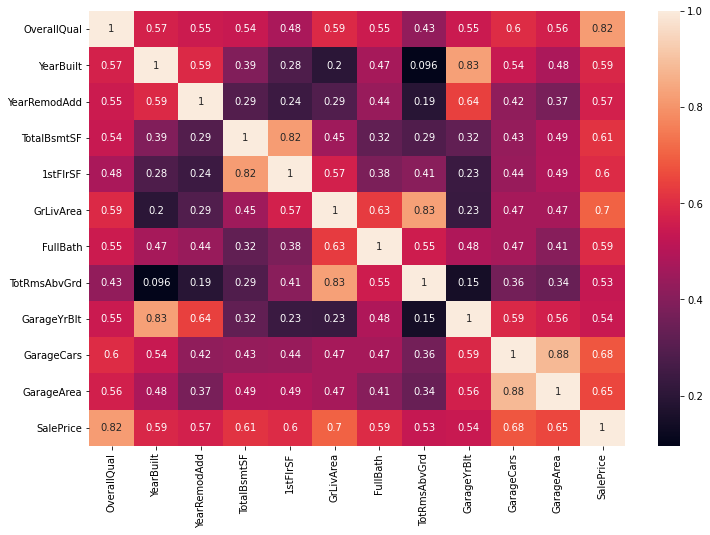

In [211]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## Encoding

In [212]:
# split into ordinals and nominals

# Ordinals
categorical_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
                     'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond','PavedDrive']

In [213]:
# Nominals:

categorical_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir',
                     'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st',
                     'Exterior2nd', 'Heating', 'Foundation']

In [219]:

from sklearn.preprocessing import LabelEncoder
for col in categorical_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [220]:
# Get k-1 dummies in nominal variables to avoid multicollinearity:

cat_feats_nominal_one_hot = pd.get_dummies(all_data[categorical_nominal], drop_first= True).reset_index(drop=True)

# checking it:

print(f'Shape of cat_feats_nominal_one_hot: {cat_feats_nominal_one_hot.shape}')
cat_feats_nominal_one_hot.head()

Shape of cat_feats_nominal_one_hot: (2919, 118)


,MSSubClass,MoSold,YrSold,MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,2,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,20,5,2007,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,60,9,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,70,2,2006,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,60,12,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [221]:
# Concatenate the one Hot Encoded categorcal nominal features with main data frame.

# First we need to drop the catgorical nominal columns from all_data:

all_data = all_data.drop(categorical_nominal, axis= 'columns')

# Now let;s to concat it:

all_data = pd.concat([all_data, cat_feats_nominal_one_hot], axis='columns')

# Checking shape now:

print(f'Shape of all_data: {all_data.shape}')

# Checking sfinal dataframe:

all_data.head()

Shape of all_data: (2919, 174)


,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,3,3,4,0,0,7,5,2003,...,1,0,0,0,0,0,1,0,0,0
1,80.0,9600,3,3,2,0,0,6,8,1976,...,1,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,3,4,0,0,7,5,2001,...,1,0,0,0,0,0,1,0,0,0
3,60.0,9550,0,3,0,0,0,7,5,1915,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,3,2,0,0,8,5,2000,...,1,0,0,0,0,0,1,0,0,0


## Modeling

In [253]:
# split dataset

train_data = pd.DataFrame(all_data[:1460])
test_data = pd.DataFrame(all_data[1460:])

train_data

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,3,3,4,0,0,7,5,2003,...,1,0,0,0,0,0,1,0,0,0
1,80.0,9600,3,3,2,0,0,6,8,1976,...,1,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,3,4,0,0,7,5,2001,...,1,0,0,0,0,0,1,0,0,0
3,60.0,9550,0,3,0,0,0,7,5,1915,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,3,2,0,0,8,5,2000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,3,3,4,0,0,6,5,1999,...,1,0,0,0,0,0,1,0,0,0
1456,85.0,13175,3,3,4,0,0,6,6,1978,...,1,0,0,0,0,1,0,0,0,0
1457,66.0,9042,3,3,4,0,0,7,9,1941,...,1,0,0,0,0,0,0,0,1,0
1458,68.0,9717,3,3,4,0,0,5,6,1950,...,1,0,0,0,0,1,0,0,0,0


In [255]:
# Taking x and y

X = train_data
y = train['SalePrice']

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [257]:
print(f'Training set sizes: {X_train.shape}, {y_train.shape}')
print(f'Validation set sizes: {X_test.shape}, {y_test.shape}')

Training set sizes: (1095, 174), (1095,)
Validation set sizes: (365, 174), (365,)


### Linear Regression

In [258]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()

In [263]:
model1.fit(X_train, y_train)
print(model1, "trained")
print("Accuracy ---> ", round(model1.score(X_test, y_test)*100), "%")

LinearRegression() trained
Accuracy --->  89 %


In [264]:
# Importing these libraries for calculating RMSE $ MAE:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE is 
 0.019851826233490865


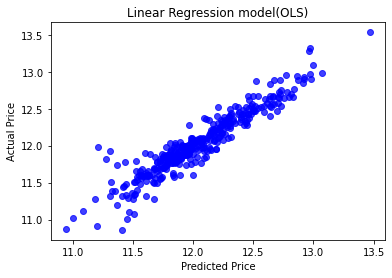

In [265]:
# Make prediction

predict_1 = model1.predict(X_test)
print('RMSE is \n', mean_squared_error(y_test, predict_1))

actual_values = y_test
plt.scatter(predict_1, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression model(OLS)')
plt.show()

### Random Forest Regression

In [266]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

In [267]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [268]:
print("Accuracy  --> ", round(model2.score(X_test, y_test)*100),"%")


Accuracy  -->  89 %


RMSE is: 
 0.020236413392343854


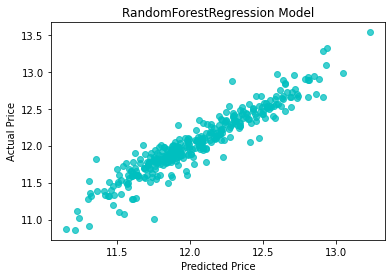

In [270]:
# Making Predictions:
predict_2 = model2.predict(X_test)

print('RMSE is: \n', mean_squared_error(y_test, predict_2))

actual_values = y_test
plt.scatter(predict_2, actual_values, alpha=.75,
            color='c')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForestRegression Model')
plt.show()

In [272]:
from sklearn.linear_model import Ridge, Lasso
model3 = Ridge()
model3.fit(X_train, y_train)

Ridge()

In [273]:
print("Accuracy  --> ", round(model3.score(X_test, y_test)*100),"%")


Accuracy  -->  90 %


RMSE is: 
 0.018371165013537586


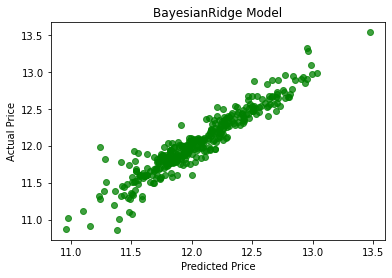

In [291]:
predict_3 = model3.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_3))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_3, actual_values, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('BayesianRidge Model')
plt.show()

In [292]:
# Lasso

model4 = Lasso()
model4.fit(X_train, y_train)

Lasso()

In [293]:
print("Accuracy --> ",round(model4.score(X_test, y_test)*100),"%")


Accuracy -->  82 %


RMSE is: 
 0.031953075623484276


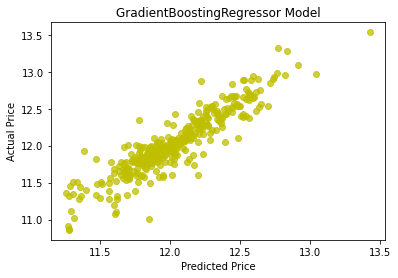

In [294]:
predict_4 = model4.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_4))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_4, actual_values, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GradientBoostingRegressor Model')
plt.show()

## Evaluation of Models

In [295]:
# Importing Libraries to carry out Cross Valitation:  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [296]:
All_models = ['Linear_Reg.','Random_Forest_Reg.','Ridge_Reg.','Lasso_Reg.']

In [297]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [298]:
# Cross-Validation

def RMSE_CV(estimator, X_train, Y_train, cv=5, n_jobs=4):
    cv_results = cross_val_score(estimator, X_train, Y_train,cv=cv, scoring="neg_mean_squared_error", n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [299]:
RMSE_CV_scores = []
RMSE_scores = []
MAE_scores =[]

In [300]:
# Calculating RMSE_CV for each one:

model_lineal_RMSE_CV = RMSE_CV(model1, X_train, y_train)
RMSE_CV_scores.append(model_lineal_RMSE_CV)
RForest_model_RMSE_CV = RMSE_CV(model2, X_train, y_train)
RMSE_CV_scores.append(RForest_model_RMSE_CV)
ridge_model_RMSE_CV = RMSE_CV(model3, X_train, y_train)
RMSE_CV_scores.append(ridge_model_RMSE_CV)
lasso_model_RMSE_CV = RMSE_CV(model4, X_train, y_train)
RMSE_CV_scores.append(lasso_model_RMSE_CV)

# Calculating rmse for each one:

linear_model_rmse = rmse(y_test, predict_1)
RMSE_scores.append(linear_model_rmse)
RForest_model_rmse = rmse(y_test, predict_2)
RMSE_scores.append(RForest_model_rmse)
Ridge_model_rmse = rmse(y_test, predict_3)
RMSE_scores.append(Ridge_model_rmse)
lasso_model_rmse = rmse(y_test, predict_4)
RMSE_scores.append(lasso_model_rmse)

# Calculating mean_absolute_error for each one:

linear_model_mae = mean_absolute_error(predict_1, y_test)
MAE_scores.append(linear_model_mae)
RForest_model_mae = mean_absolute_error(predict_2, y_test)
MAE_scores.append(RForest_model_mae)
Ridge_model_mae = mean_absolute_error(predict_3, y_test)
MAE_scores.append(Ridge_model_mae)
lasso_model_mae = mean_absolute_error(predict_4, y_test)
MAE_scores.append(lasso_model_mae)

In [301]:
final_evaluation_scores = pd.DataFrame(All_models, columns = ['Regressors'])
final_evaluation_scores['RMSE_CV_scores'] = RMSE_CV_scores
final_evaluation_scores['RMSE_scores'] = RMSE_scores
final_evaluation_scores['MAE_scores'] = MAE_scores
final_evaluation_scores

,Regressors,RMSE_CV_scores,RMSE_scores,MAE_scores
0,Linear_Reg.,0.163874,0.140897,0.096926
1,Random_Forest_Reg.,0.143592,0.142255,0.098472
2,Ridge_Reg.,0.154789,0.135540,0.095150
3,Lasso_Reg.,0.198915,0.178754,0.128948


In [315]:
Final_model = (np.expm1(model1.predict(test_data)) + np.expm1(model2.predict(test_data)) + np.expm1(model3.predict(test_data)) + np.expm1(model4.predict(test_data)) ) / 3
Final_model

array([156125.81356607, 165949.65553684, 236571.46856031, ...,
       207793.21355245, 146713.59711625, 308709.91725707])

In [316]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Final_model
sub.to_csv('final.csv',index=False)
result4 =  pd.read_csv('final.csv')
result4.head(20)

,Id,SalePrice
0,1461,156125.813566
1,1462,165949.655537
2,1463,236571.468560
3,1464,253791.341684
4,1465,253169.415650
5,1466,233920.153002
6,1467,239711.053922
7,1468,222534.131932
8,1469,245414.468646
9,1470,171925.912911


In [317]:
sample_submission.head(20)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831
